### Ejercicio Opcional

Python es un lenguaje de programación muy utilizado en el procesamiento de imágenes. En este ejercicio veremos una aplicación de detección de elementos en una imagen de microscopía de escaneo (en inglés: Scanning Element Microscopy (SEM)).

En esta imagen se puede ver una muestra de vidrio (gris claro) con algunas burbujas (elementos negros) y granos de arena (gris oscuro). Queremos ser capaces de detectar los diferentes elementos de la muestra a partir de la imagen.

Una imagen se puede ver como una matriz bidimensional donde cada elemento de la matriz corresponde al valor de un pixel de la imagen. Por ejemplo, si miramos la matriz de la imagen que os proporcionamos, veremos valores que van de 0 a 255. Así pues, para distinguir los diferentes elementos de la muestra de vidrio, nos tendremos que fijar en el nivel de gris de los píxeles de la imagen a través del histograma. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


Parte A: 

* Para poder identificar mejor los elementos de la muestra de vidrio, primero hemos aplicado un filtro de mediana para reducir el ruido. Grafica ahora la distribución de los píxeles de la imagen inicial y la imagen filtrada. ¿Qué diferencia puedes apreciar entre ambas distribuciones?

**Nota:** Utiliza la función [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) de la librería Seaborn para visualizar la distribución de los valores píxeles de la imagen.

Parte B: 

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

* Una vez que hayas definido los umbrales, muestra por pantalla una imagen donde cada uno de los elementos esté en un color diferente. 

In [52]:
# Respuesta

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

import seaborn as sns
import pandas as pd
import seaborn_image as isns

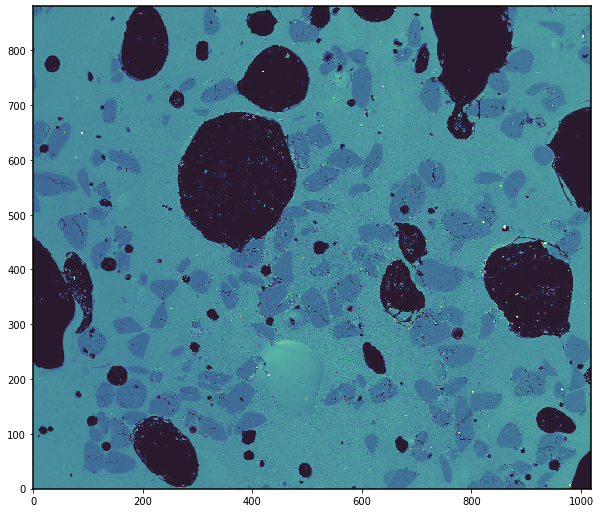

In [54]:
# Visualizo la imagen y su distribución
imagen = mpimg.imread('SEM_image.jpg')
plt.subplots(figsize=[10,10])
plt.imshow(imagen)

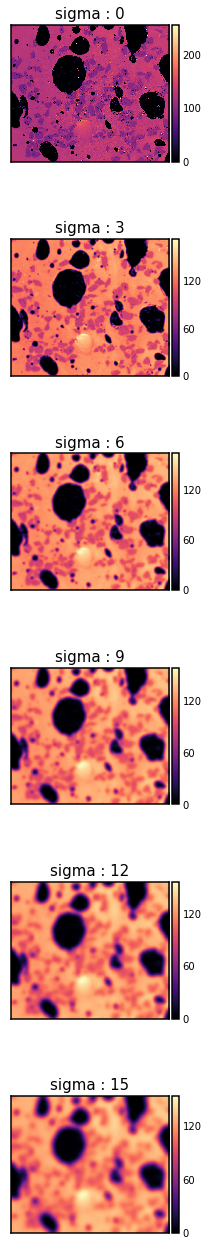

In [55]:
# Utilizo el filtro gaussiano, genera 6 imagenes con distintas sigmas
isns.FilterGrid(
    data = imagen,
    filt = "gaussian",
    row="sigma",
    sigma=[0, 3, 6,9,12,15],
    cmap="magma"
)

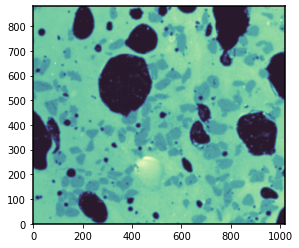

In [56]:
# aplico filtro antiruido de sigma 3 y visualizo la imagen y su distribución
imagensinruido = ndimage.gaussian_filter(imagen,3)
plt.imshow(imagensinruido)

c:\users\jd\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jd\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

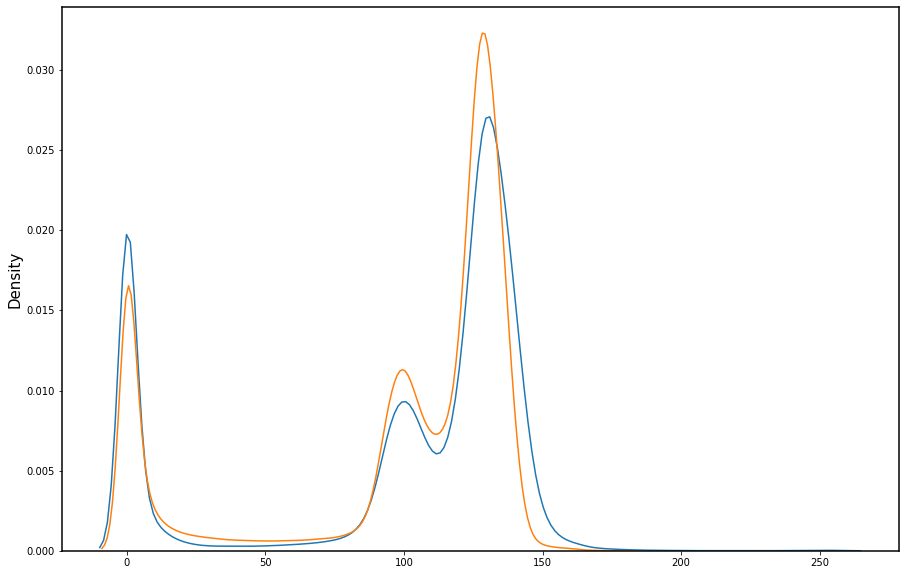

In [57]:
# Utilizamos distplot para mostrar la distribución de la imagen original y de la nueva imagen
plt.subplots(figsize=[15,10])
sns.distplot(imagen,hist = False)
sns.distplot(imagensinruido,hist=False)

In [58]:
## Con el grafico establezco los umbrales para diferencia los píxeles de arena, de vidrio y de burbuja
Im3sep = imagensinruido

In [59]:
## Creo 3 matrices true / false según lo que esté buscando ( Vidrio,Cristal, burbuja)
Burbujas = imagensinruido < 50
Arena = (imagensinruido >= 50) & (imagensinruido < 115)
Vidrio = imagensinruido >= 115

In [60]:
## Creo una imagen nueva y la asigno los valores según el color. posteriormente reviso el número de valores a 0. No tiene que haber ninguno.
Im3sep = imagensinruido
Im3sep[:,:] = 0
Im3sep[Burbujas] = 50
Im3sep[Arena] = 150
Im3sep[Vidrio] = 255
# El valor mínimo es 50, lo que significa que no hay 0. todos los valores de la matriz tienen un color asignado.
Im3sep.flatten().min()

50

<AxesSubplot:>

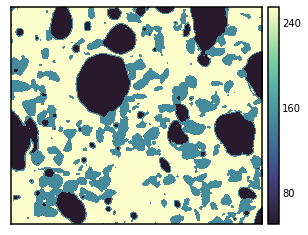

In [61]:
isns.imgplot(Im3sep)